### Erste Schritte:
 - Yolov8 herunterladen
 - Datensatz von Roboflow herunterladen
 - Netz trainieren

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)
#model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')  # build from YAML and transfer weights


In [1]:
#code snip from roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="5kVm1XELa7ddvmbGYiF3")
project = rf.workspace("ahoi-brause").project("robojistic-brause")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Robojistic-Brause-4 in yolov8:: 100%|██████████| 366/366 [00:02<00:00, 171.31it/s]


In [ ]:
# assign directory
%cd {'F:\Robo 2'}

!yolo task=segment mode=train model='F:\Rob3\yolov8n-seg.pt' data='F:\Robo3\Robojistic-Brause-4\data.yaml' epochs=80 imgsz=640

### Test trained model
 - Load train Model
 - Test with test images

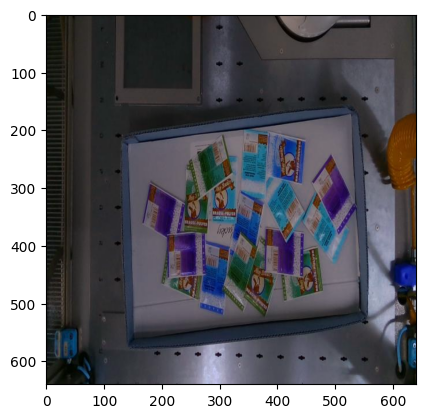

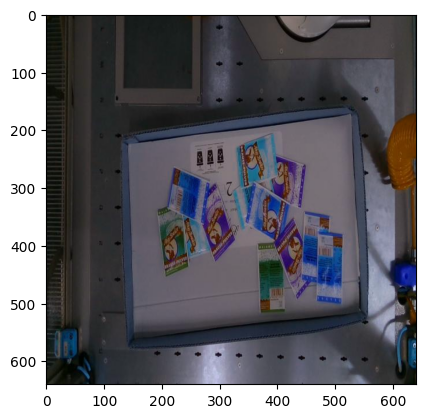

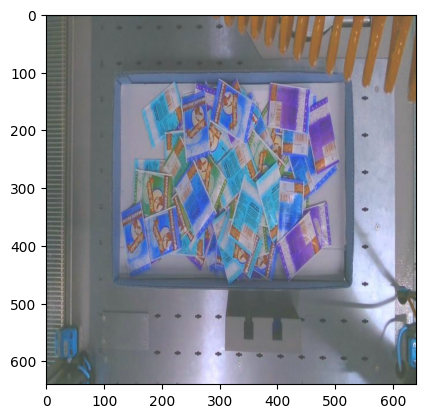

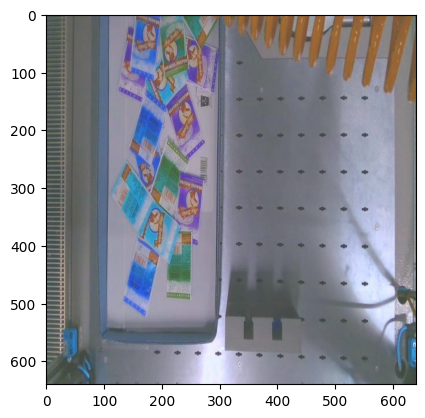

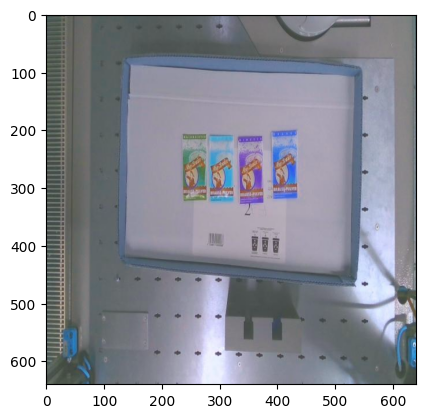

In [1]:

import os
import cv2
import matplotlib.pyplot as plt
# assign directory
directory = r'F:\Robo3\Robojistic-Brause-4\test\images'
images = []
 
#pictures in one array
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        img= cv2.imread(f)
        plt.imshow(img)
        plt.show()
        images.append(img)

{0: 'green', 1: 'orange', 2: 'red', 3: 'yellow'}


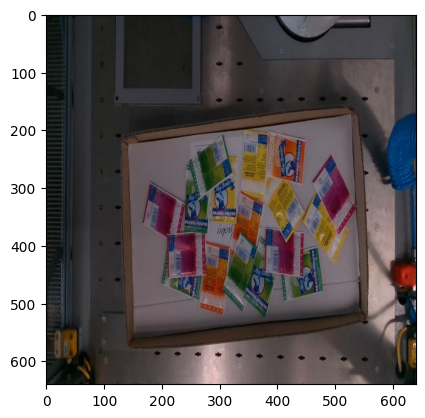

Ultralytics YOLOv8.0.28  Python-3.9.1 torch-2.0.1+cpu CPU
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs



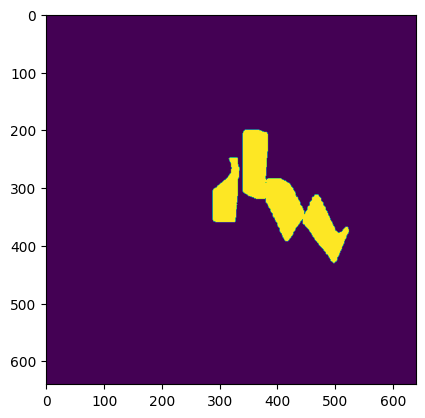

0: 640x640 6 greens, 3 oranges, 4 reds, 4 yellows, 576.5ms
Speed: 3.0ms pre-process, 576.5ms inference, 196.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict67


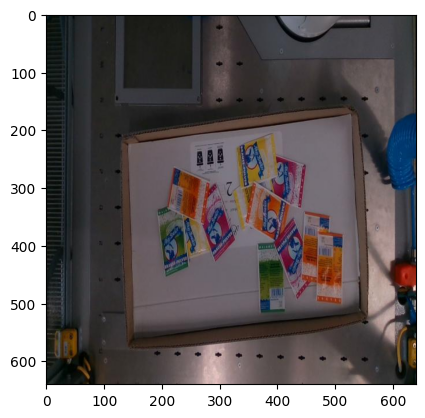

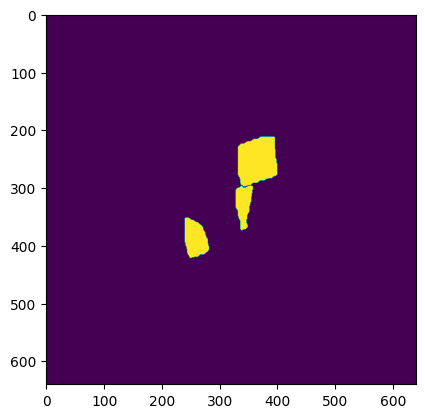

0: 640x640 2 greens, 4 oranges, 3 reds, 3 yellows, 561.5ms
Speed: 3.0ms pre-process, 561.5ms inference, 84.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict67


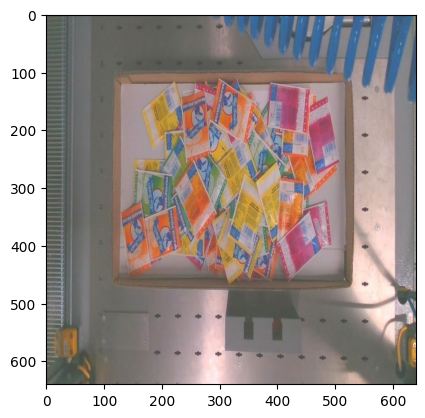

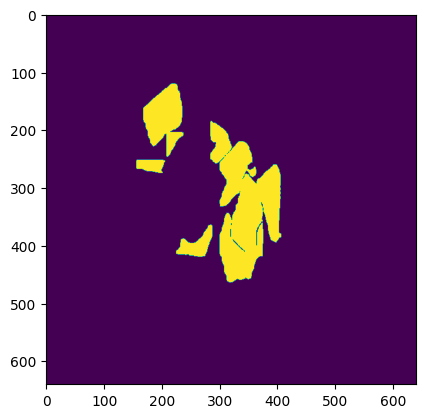

0: 640x640 6 greens, 17 oranges, 6 reds, 13 yellows, 520.6ms
Speed: 3.0ms pre-process, 520.6ms inference, 223.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict67


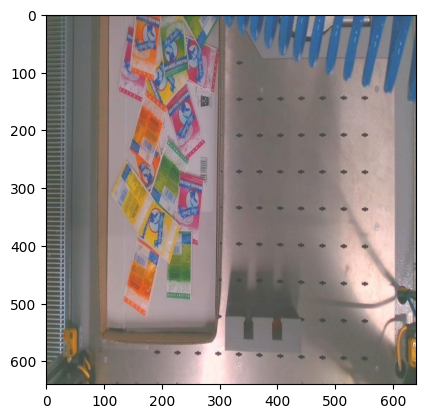

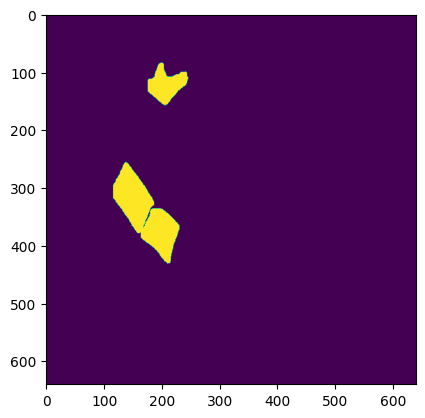

0: 640x640 4 greens, 6 oranges, 4 reds, 3 yellows, 616.9ms
Speed: 3.0ms pre-process, 616.9ms inference, 114.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict67


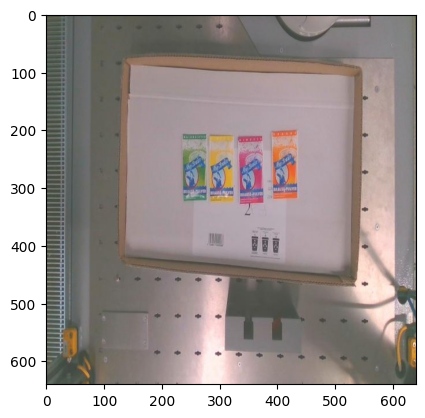

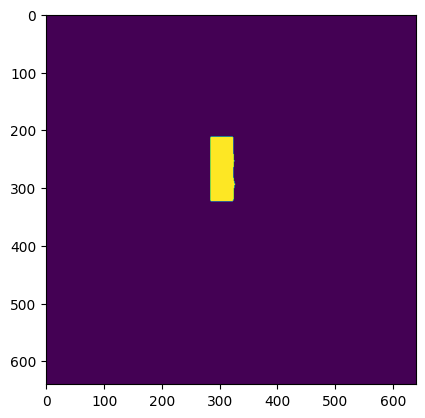

0: 640x640 1 green, 1 orange, 1 red, 1 yellow, 675.2ms
Speed: 4.0ms pre-process, 675.2ms inference, 40.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict67


In [6]:
import cv2
from ultralytics import YOLO
import numpy as np
import torch
import matplotlib.pyplot as plt
# assign directory
model = YOLO(r'F:\Robo3\runs\segment\train9\weights\best.pt')
print(model.names)

for img in images:
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)



    
    for result in results:
        
        # get array results
        masks = result.masks.masks
        boxes = result.boxes.boxes
        # extract classes
        clss = boxes[:, 5]
        # get indices of results where class is 0 (people in COCO)
        people_indices = torch.where(clss == 3)
        # use these indices to extract the relevant masks
        for index in people_indices:
            people_masks = masks[index]
            for i in range(len(people_masks)):

                result_mask = people_masks[i].cpu().numpy()
                
                print(result_mask)

                plt.imshow(result_mask)
                plt.show()
